# Calibration

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [IRFs](#toc2_)    
- 3. [Identification](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import pickle
import numpy as np

import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

from FullHANKSAMModel import FullHANKSAMModelClass
from figures import create_fig, save_fig, vary_par, IRF_figs

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = FullHANKSAMModelClass(name='baseline')
model.load()

In [3]:
par = model.par
ss = model.ss
path = model.path

In [4]:
model.find_ss(calib_beta=False)

In [5]:
model.compute_jacs(skip_shocks=True)
model.find_transition_path(shocks=['shock_TFP'],do_end_check=False)
model.calc_moms_path(do_print=True)

w_share                   =      82.9560
var_u                     =       0.8718
std_W                     =       0.0000
timeshift                 =       9.0000
timeshift_obj             =       0.0000
EU_share                  =      45.0115


## 2. <a id='toc2_'></a>[IRFs](#toc0_)

In [6]:
model_flex = model.get_flex(do_print=True)

w_share                   =      82.9560
var_u                     =       7.6875
std_W                     =       0.0000
timeshift                 =      20.0000
timeshift_obj             =      37.1447
EU_share                  =      34.5691


In [7]:
model_RA = model.get_RA(do_print=True)

w_share                   =      82.9560
var_u                     =       0.8606
std_W                     =       0.0000
timeshift                 =       7.0000
timeshift_obj             =       0.7849
EU_share                  =      46.8536


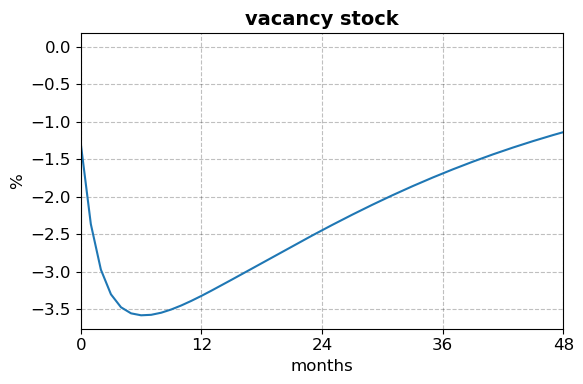

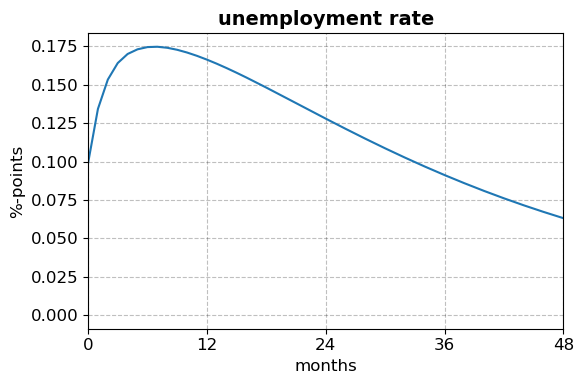

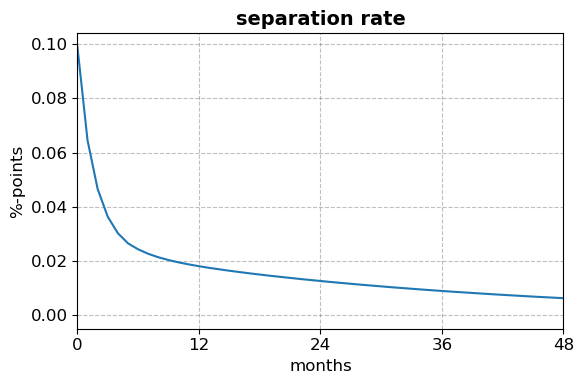

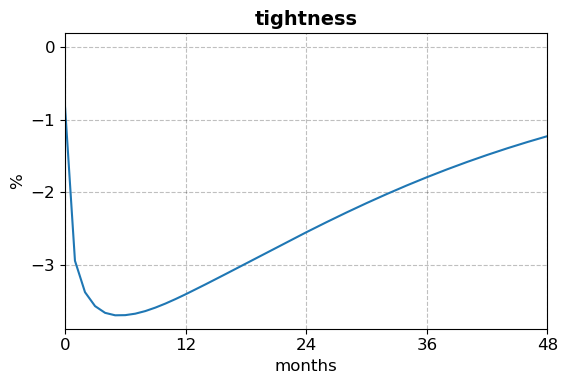

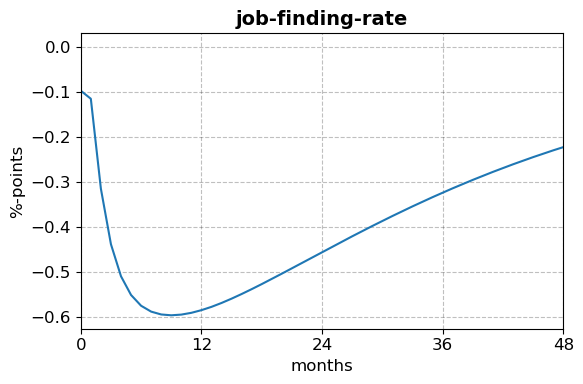

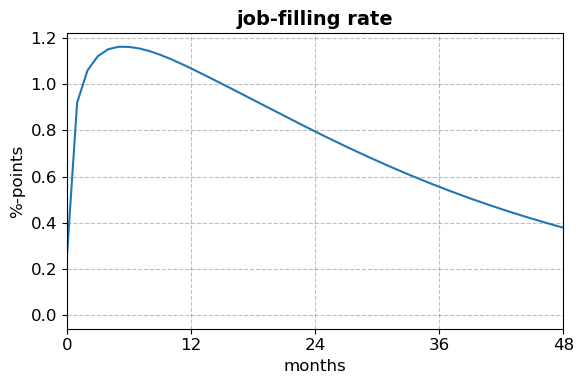

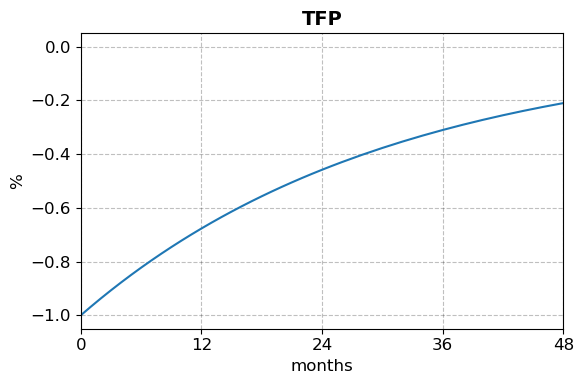

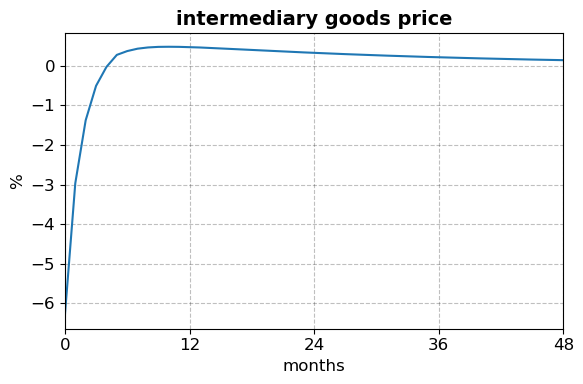

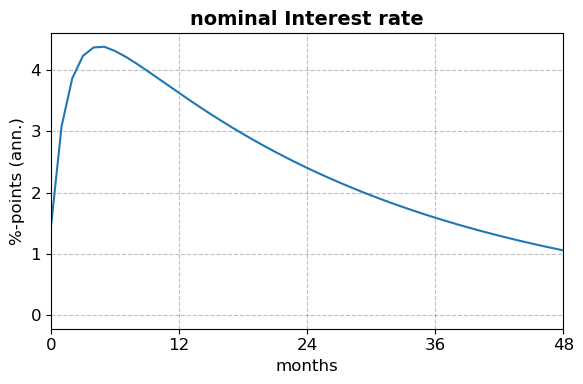

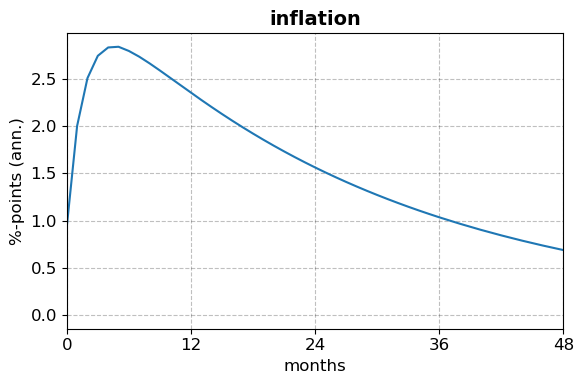

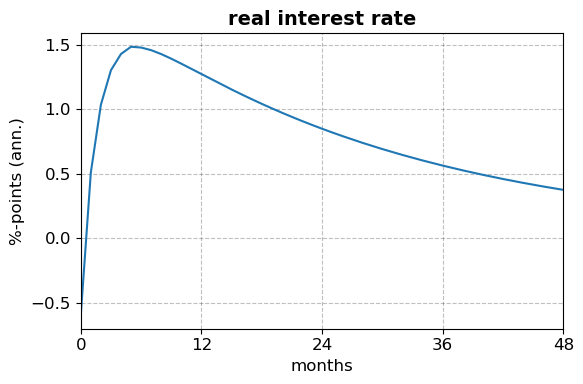

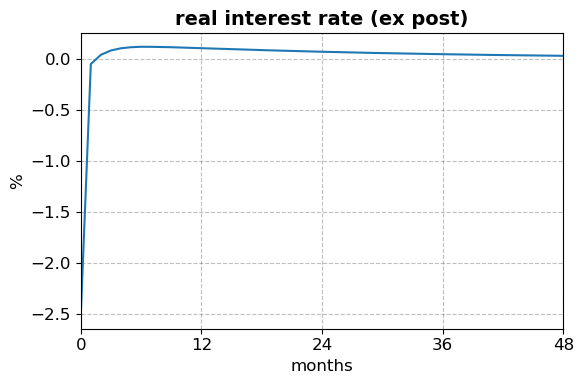

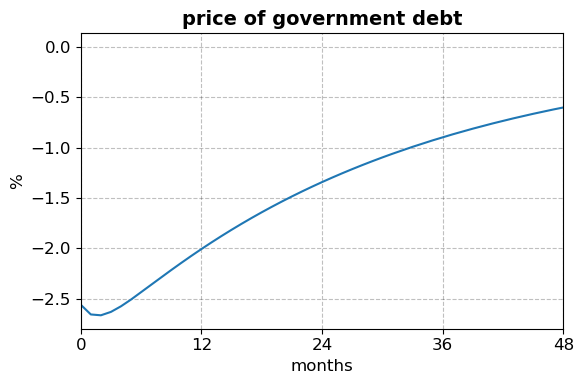

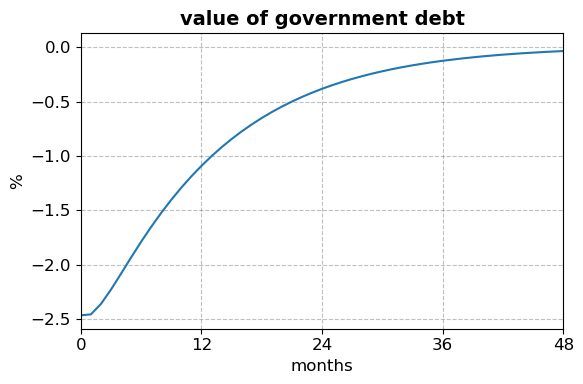

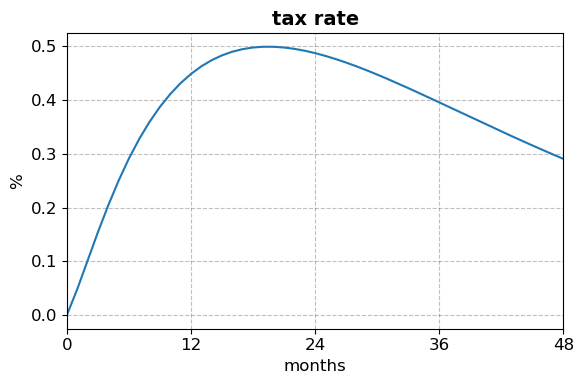

In [8]:
for varname,title in model.varlabels.items():
    
    IRF,ylabel = model.get_IRF(varname)

    fig,ax = create_fig()    
    ax.plot(IRF,label='sticky prices, HA')
    save_fig(fig,ax,
             filename=f'IRF_{varname}',
             title=title,
             ylabel=ylabel) 

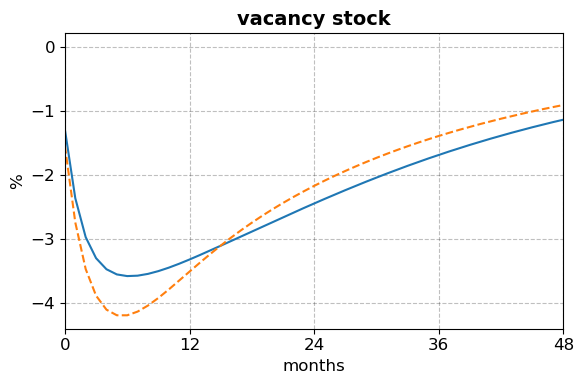

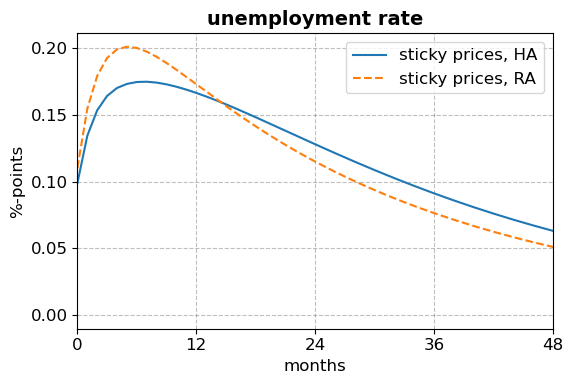

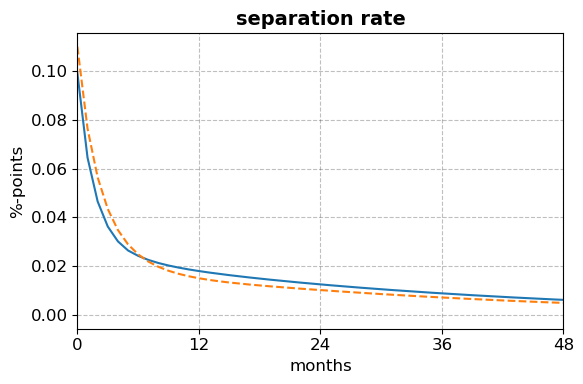

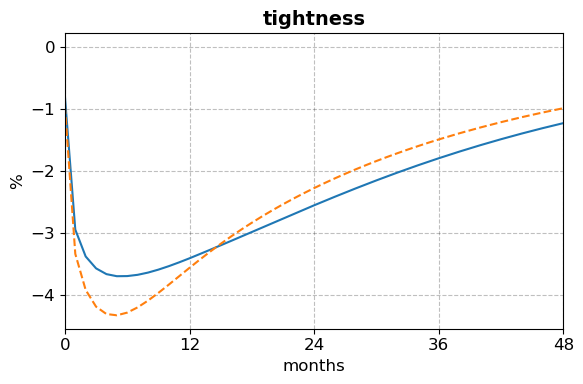

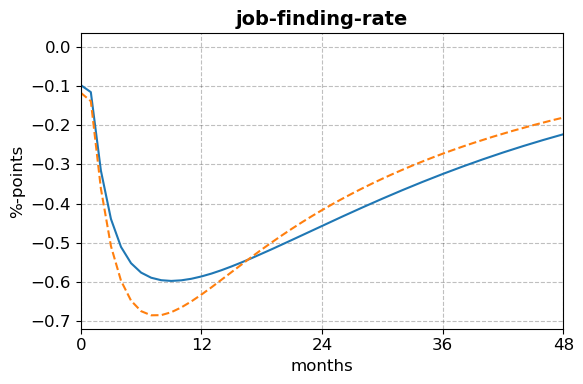

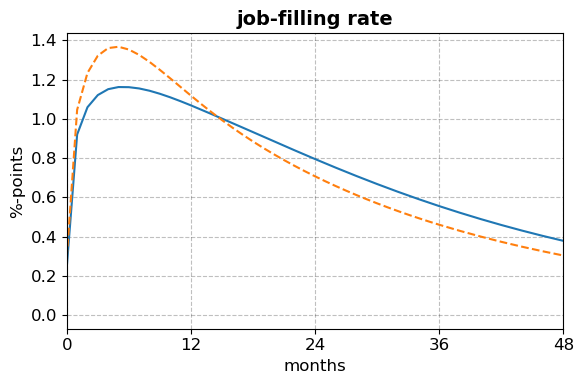

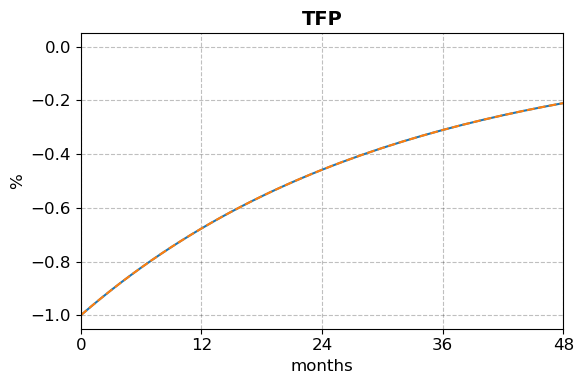

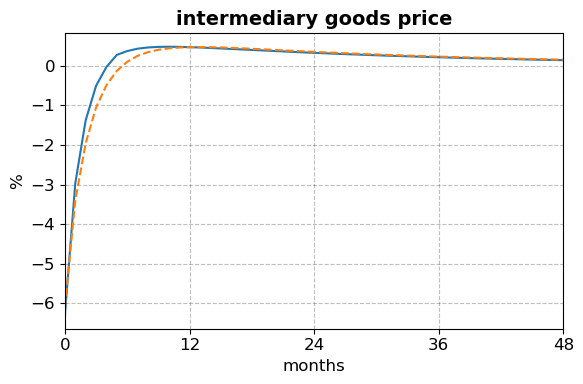

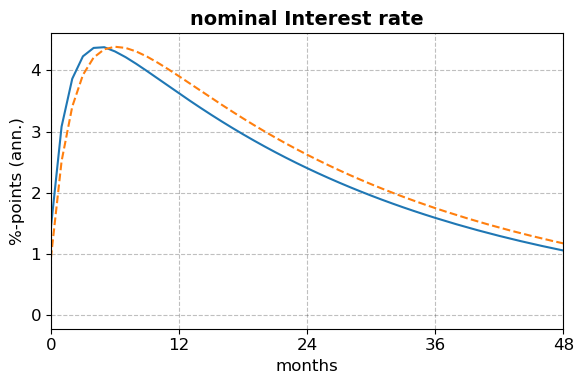

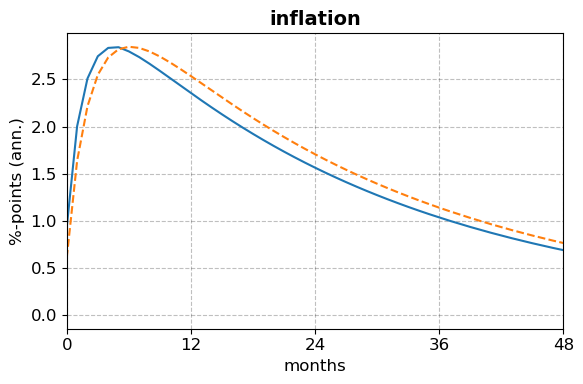

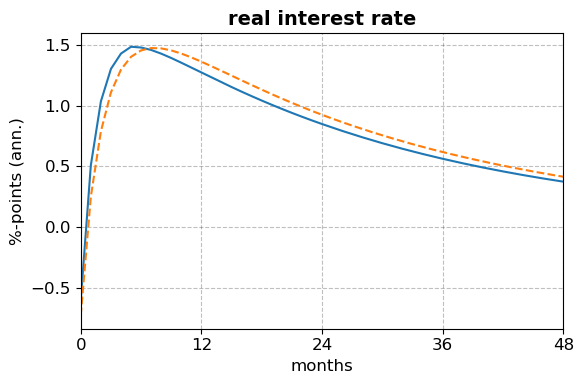

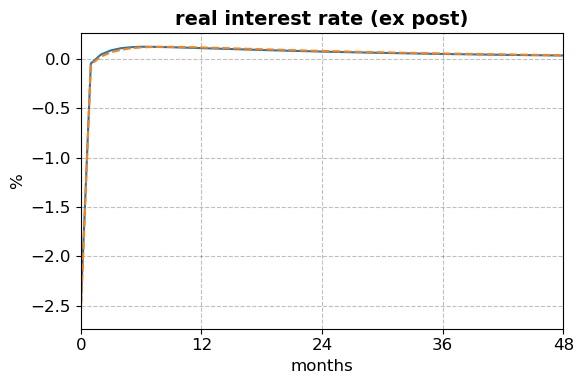

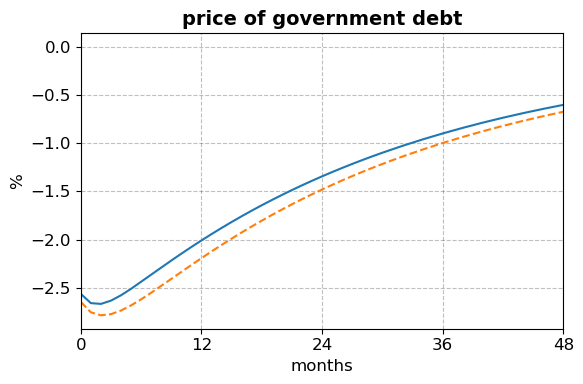

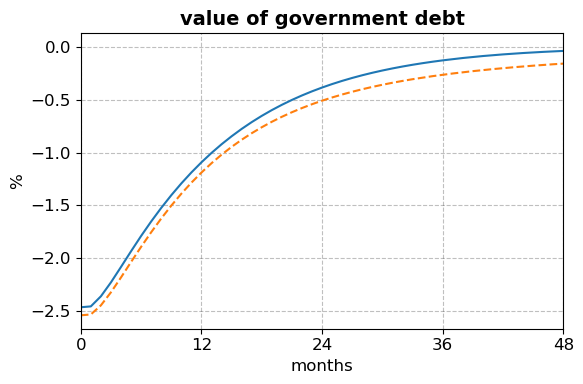

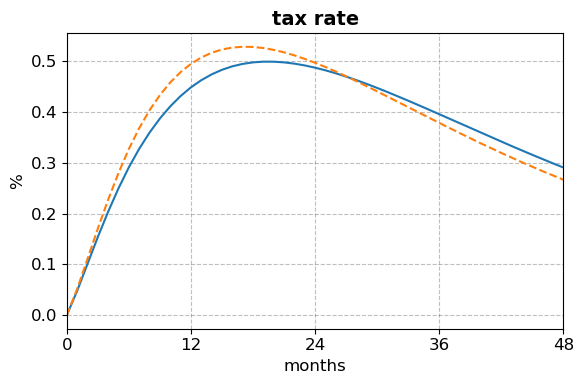

In [9]:
for varname,title in model.varlabels.items():
    
    IRF,ylabel = model.get_IRF(varname)
    IRF_RA,_ = model_RA.get_IRF(varname)    

    fig,ax = create_fig()    
    ax.plot(IRF,label='sticky prices, HA')
    ax.plot(IRF_RA,ls='--',label='sticky prices, RA')
    save_fig(fig,ax,
             filename=f'IRF_{varname}_RA',
             title=title,
             legend=varname=='u',
             ylabel=ylabel) 

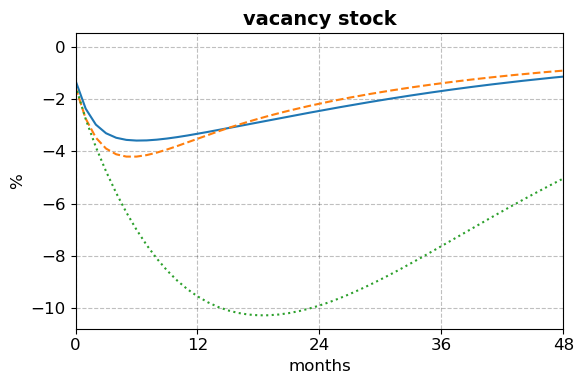

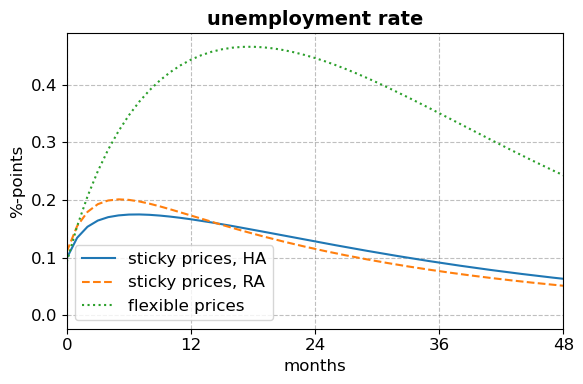

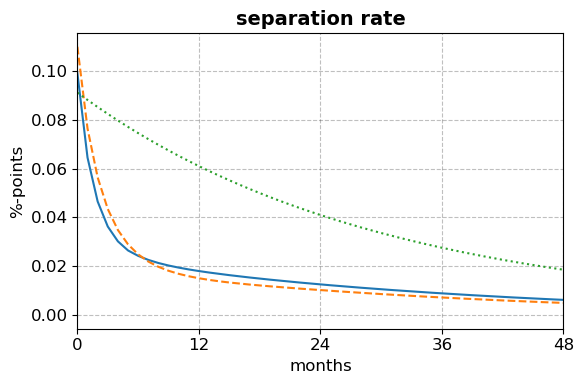

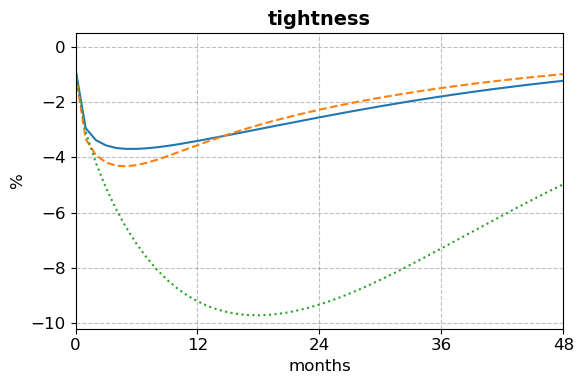

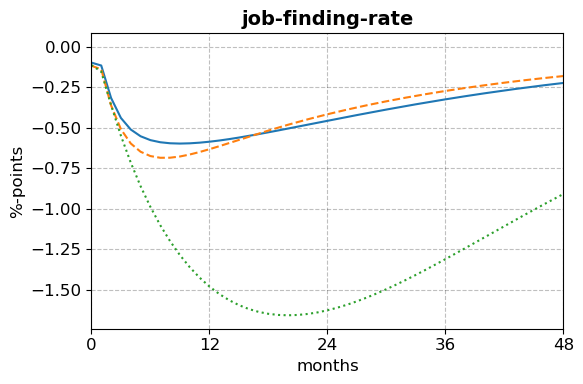

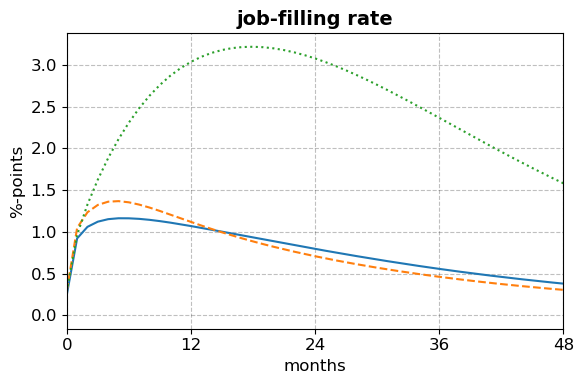

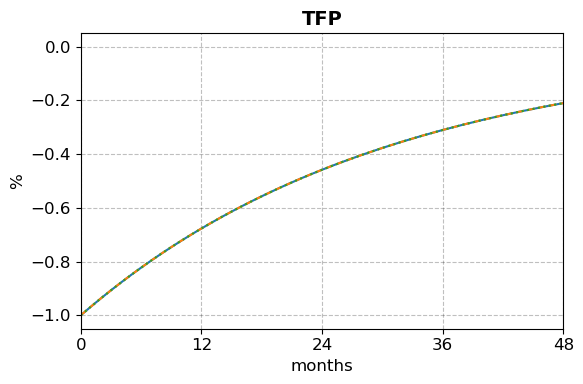

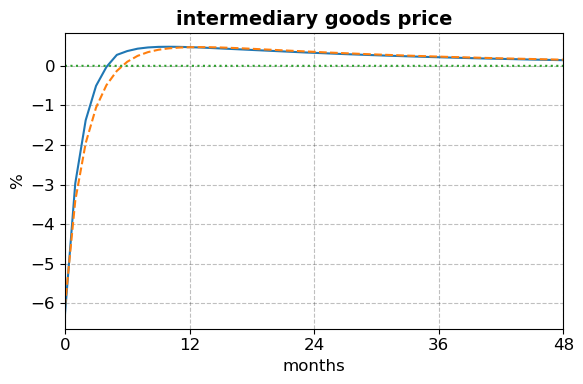

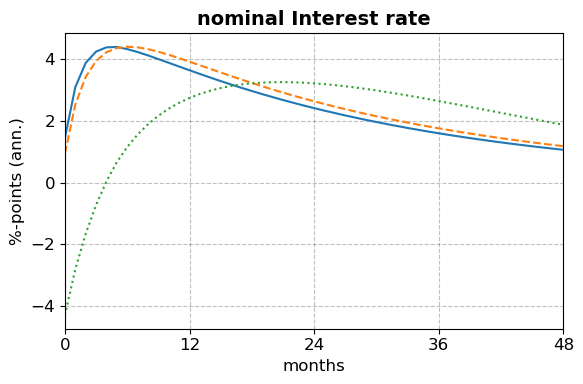

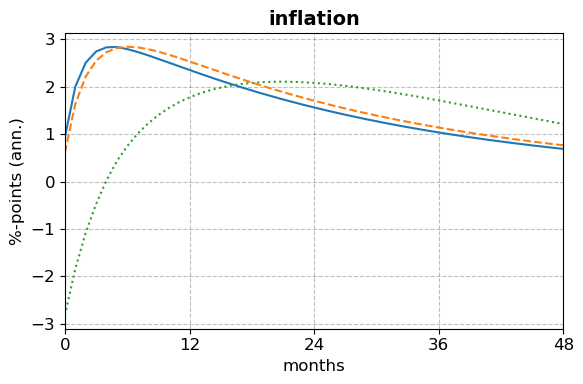

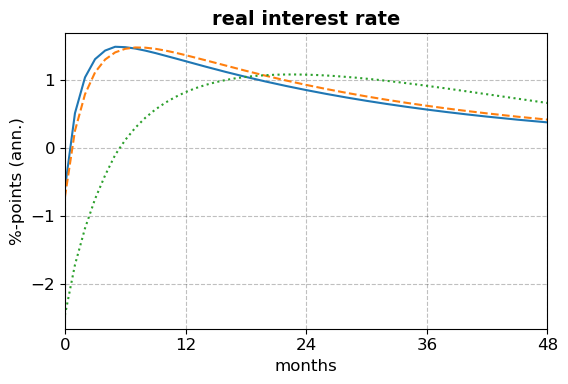

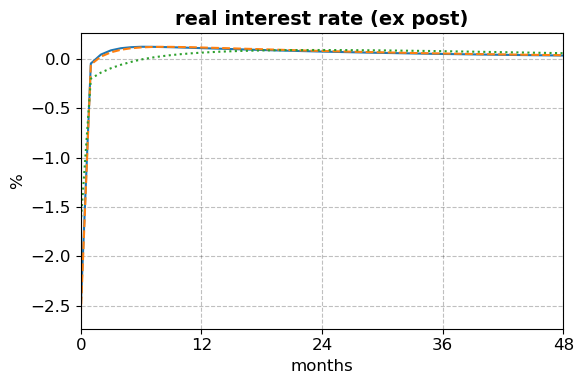

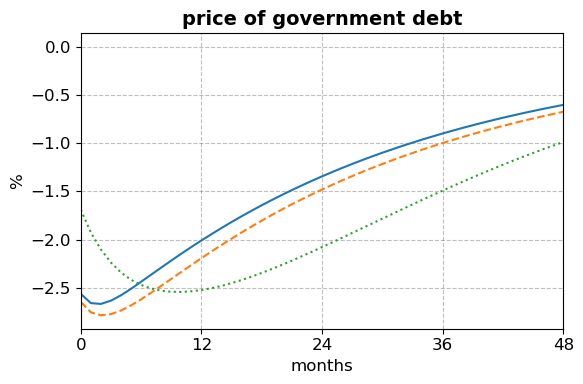

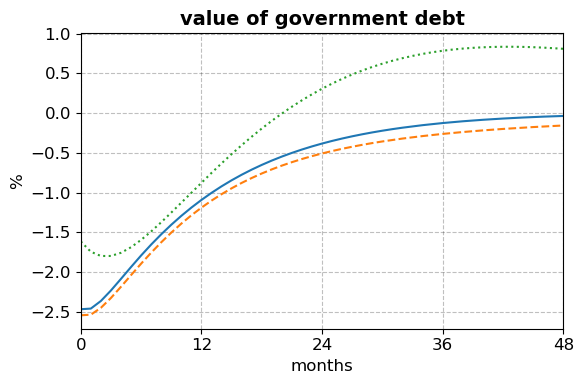

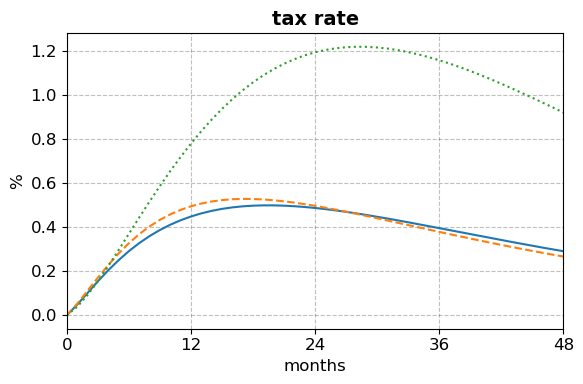

In [10]:
for varname,title in model.varlabels.items():
    
    IRF,ylabel = model.get_IRF(varname)
    IRF_RA,_ = model_RA.get_IRF(varname)    
    IRF_flex,_ = model_flex.get_IRF(varname)

    fig,ax = create_fig()    
    ax.plot(IRF,label='sticky prices, HA')
    ax.plot(IRF_RA,ls='--',label='sticky prices, RA')
    ax.plot(IRF_flex,ls=':',label='flexible prices')
    save_fig(fig,ax,
             filename=f'IRF_{varname}_RA_flex',
             title=title,
             legend=varname=='u',
             ylabel=ylabel) 

## 3. <a id='toc3_'></a>[Identification](#toc0_)

In [11]:
del model_RA
del model_flex

baseline: psi = 1.6978
psi =  0.9800
psi =  1.0000
psi =  1.0200
completed in 4.0 mins 2 secs


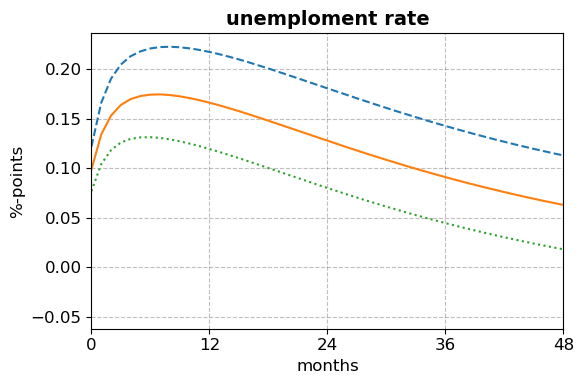

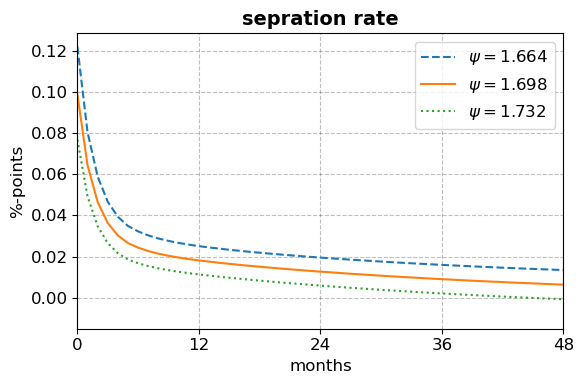

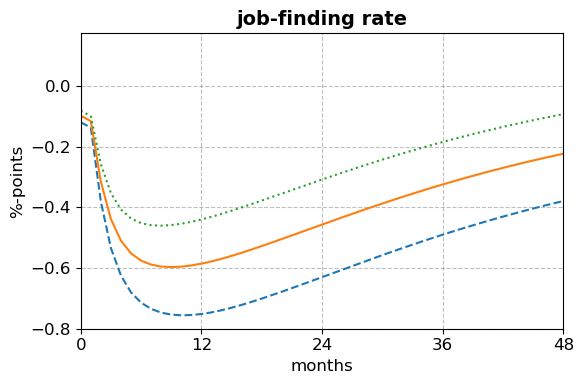

baseline: xi = 0.0147
xi =  0.8000
xi =  1.0000
xi =  1.2000
completed in 6.0 mins 49 secs


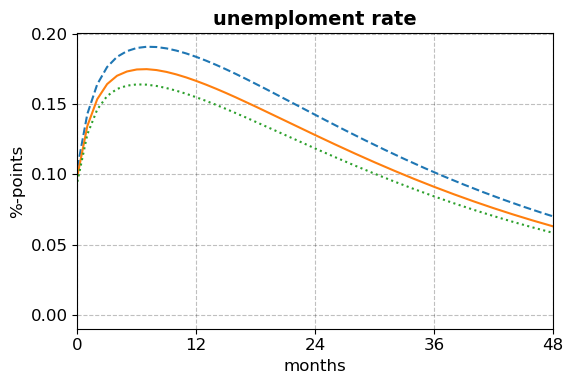

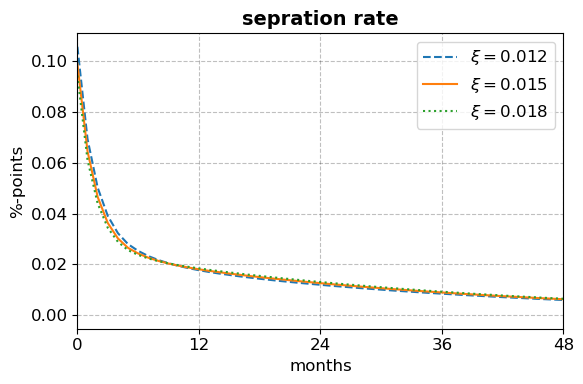

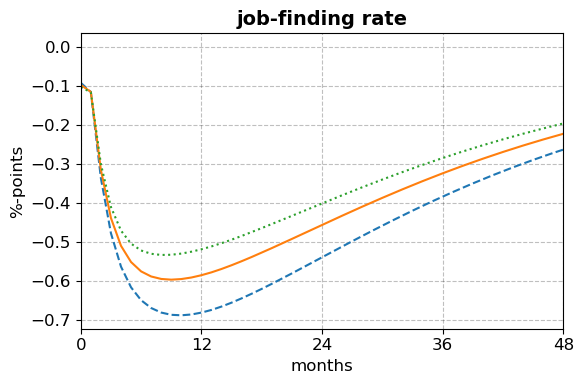

baseline: w_ss = 0.6913
w_ss =  0.9500
w_ss =  1.0000: error, Unable to allocate 1001. MiB for an array with shape (600, 3, 100, 27, 27) and data type float64
w_ss =  1.0500: error, Unable to allocate 1001. MiB for an array with shape (600, 3, 100, 27, 27) and data type float64
completed in 7.0 mins 2 secs


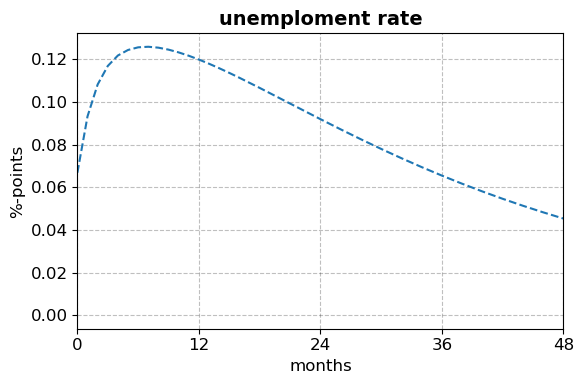

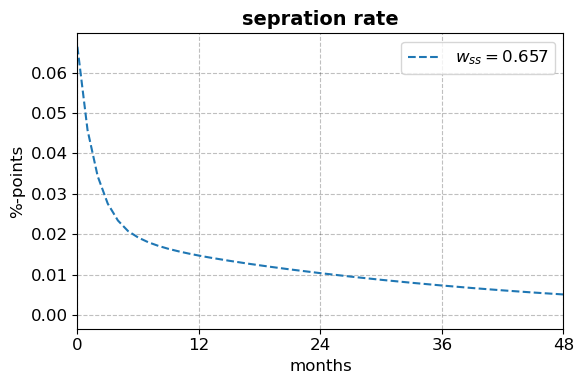

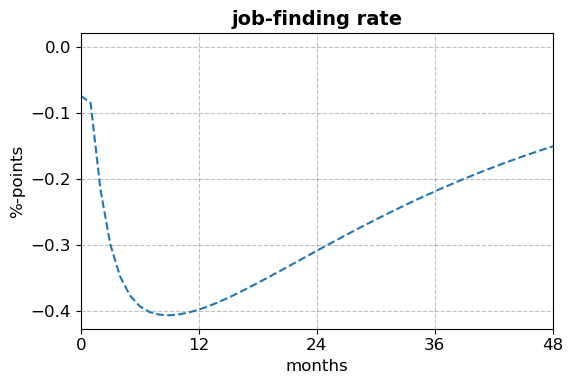

In [12]:
for parname,labelname in [('psi','\psi'),('xi','\\xi'),('w_ss','w_{{ss}}')]:
    
    if parname == 'psi':
        facs = [0.98,1.0,1.02]
        do_ss = False
        skip_hh = True
    elif parname == 'xi':
        facs = [0.8,1.0,1.2]
        do_ss = False
        skip_hh = True
    elif parname == 'w_ss':
        do_ss = True
        skip_hh = False
        facs = [0.95,1.0,1.05]        
    else:
        raise NotImplementedError
        
    models = vary_par(model,parname,facs,do_ss=do_ss,skip_hh=skip_hh,shocks=['shock_TFP'],fac=True,do_print=True)
                          
    labels = [f'${labelname} = {model_.par.__dict__[parname]:.3f}$' for model_ in models]
    lss = ['--','-',':']

    for varname,title in [('u','unemploment rate'),('delta','sepration rate'),('lambda_u','job-finding rate')]:
        IRF_figs(models,labels,lss,colors,title,'identification',parname,varname,legend=varname=='delta',T_max=48)
    
    plt.show()